<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/DT_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression using Decision Tree

In [0]:
from sklearn import datasets
#Load the diabetes dataset (regression).
diabetes = datasets.load_diabetes()

As we know, each dataset comes with four keys:
- DESCR: Dataset description
- data: Predictor columns
- target: Response column
- feature_names: Column names for predictors

In [2]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
#Read dataset description

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
#See column names for the predictors

diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
#Divide dataset into train and test sets.

# Shape of predictors data
diabetes.data.shape

(442, 10)

In [6]:
## Shape of response variable
diabetes.target.shape

(442,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [0]:
#Import Decision Tree Regressor and fit the model to the training data.

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train, Y_train)
#Make predictions and evaluate output.
predictions = tree.predict(X_test)

In [10]:
#Check the top 5 predictions and actual values.

predictions[:5]

array([171.47286822, 171.47286822, 171.47286822, 164.39473684,
       171.47286822])

In [11]:
Y_test[:5]

array([185., 150., 246., 184., 110.])

In [12]:
#We see that the predictions are not accurate. Let's evaluate the prediction accuracy.

from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(Y_test, predictions)
r2_score(Y_test, predictions)

0.37144886233975805

The regression results are not very accurate. Let's try to understand the reason for it by visualizing the tree output.

First, we export the tree output to a dot format object.
Below function show some of the additional parameters that you can pass to the export_graphviz function. Read the documentation for export_graphviz to understand more about these parameters.
http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [0]:
from sklearn.tree import export_graphviz

In [0]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=diabetes.feature_names, out_file=None)

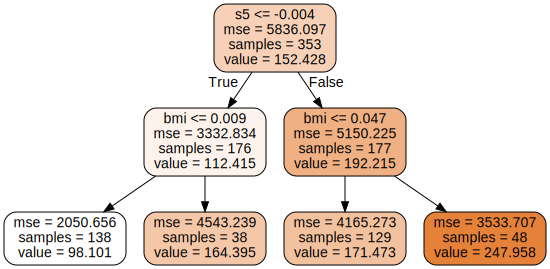

In [15]:
#Next, we use graphviz to plot the dot data as a decision tree.
import graphviz
graphviz.Source(dot_data)

We see that on the terminal nodes (i.e. leaves) the model outputs one of the four values for all the predictions. We can also confirm this with the below code by looking at the predicted unique values.

In [16]:
import numpy as np
np.unique(predictions)

array([ 98.10144928, 164.39473684, 171.47286822, 247.95833333])

Decision Trees on their own are very simple models, which do not provide as accurate predictions as some of the other models can. 

In [17]:
#We can also export the graph to other formats like png, pdf etc. by using pydotplus package.
from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(dot_data)
graph.write_png("Regressor_tree.png")

True